In [169]:
library('tidyverse')

In [179]:
df = read_csv('Mr. Trash Wheel Data.csv', col_names = TRUE)
head(df)

Rows: 651 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Month, Date
dbl (7): Dumpster, Year, Weight (tons), Volume (cubic yards), Glass Bottles,...
num (5): Plastic Bottles, Polystyrene, Cigarette Butts, Plastic Bags, Wrappers

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Dumpster,Month,Year,Date,Weight (tons),Volume (cubic yards),Plastic Bottles,Polystyrene,Cigarette Butts,Glass Bottles,Plastic Bags,Wrappers,Sports Balls,Homes Powered*
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,May,2014,5/16/2014,4.31,18,1450,1820,126000,72,584,1162,7,0
2,May,2014,5/16/2014,2.74,13,1120,1030,91000,42,496,874,5,0
3,May,2014,5/16/2014,3.45,15,2450,3100,105000,50,1080,2032,6,0
4,May,2014,5/17/2014,3.10,15,2380,2730,100000,52,896,1971,6,0
5,May,2014,5/17/2014,4.06,18,980,870,120000,72,368,753,7,0
6,May,2014,5/20/2014,2.71,13,1430,2140,90000,46,672,1144,5,0


Above is a preview of the data used for this analysis. This is a TidyTuesday dataset recording the collection of trash in the Baltimore harbor by Mr. Trash Wheel!

Warning message in geom_text(aes(x = 2021.3, y = 270, label = "\nLast Year \nof Complete Data \n(2023)")):
“All aesthetics have length 1, but the data has 11 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in geom_segment(aes(x = 2022, y = 225, xend = 2022.7, yend = 225), :
“All aesthetics have length 1, but the data has 11 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


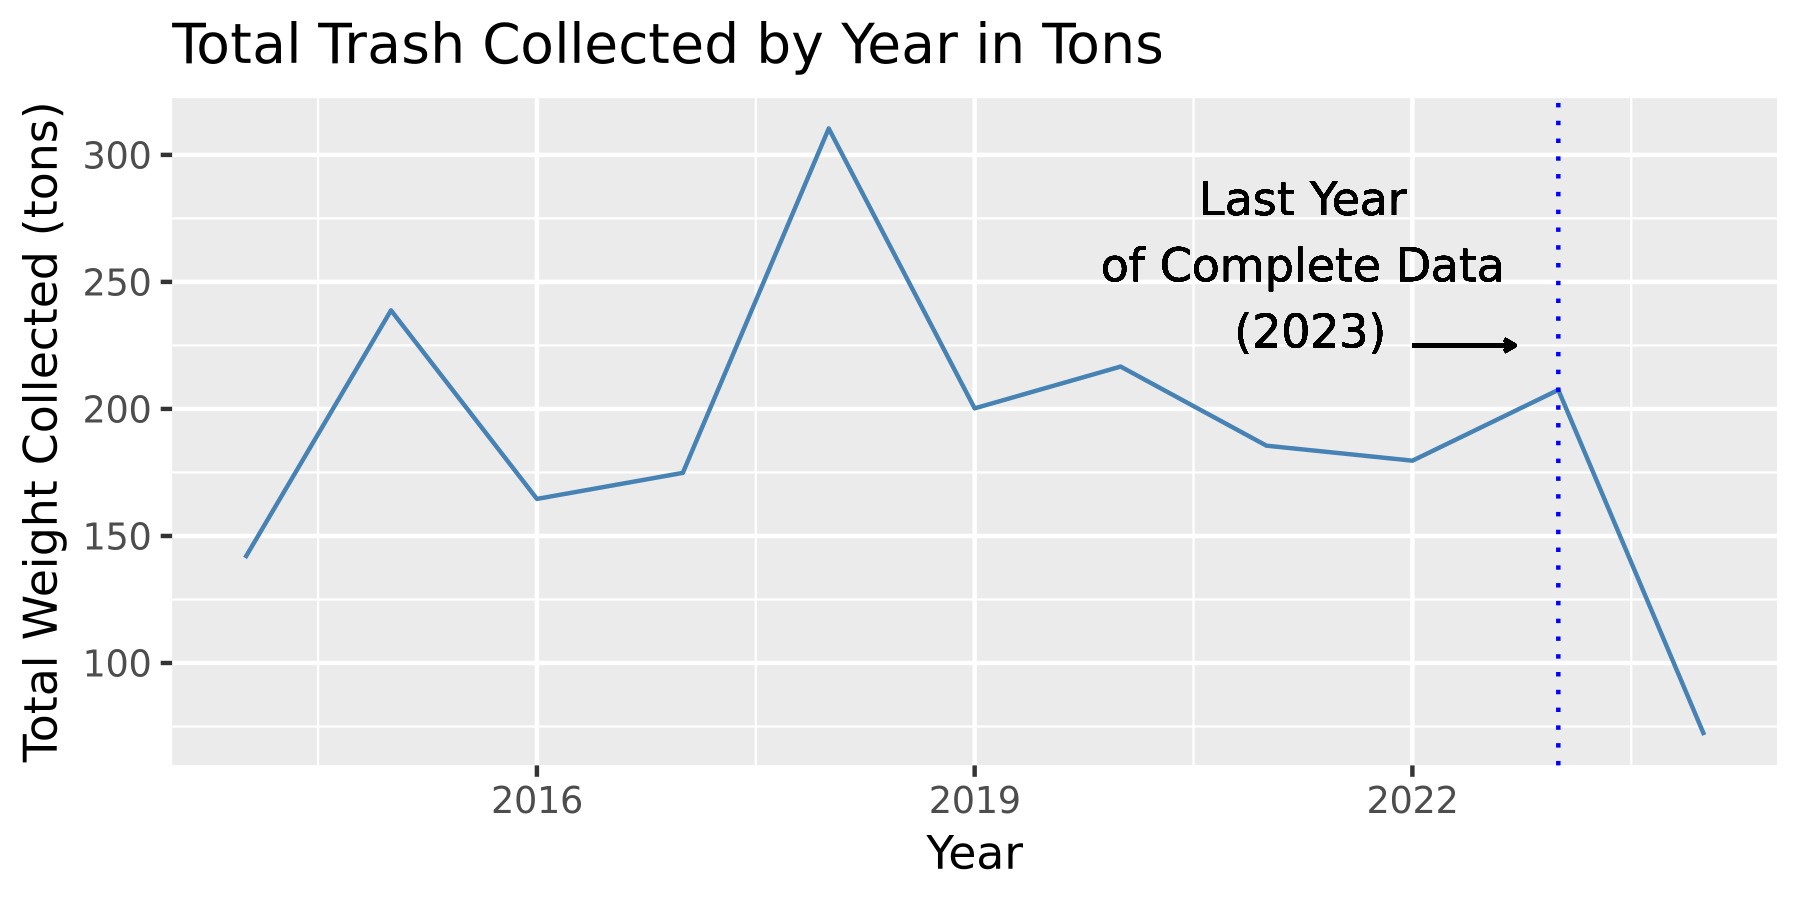

In [180]:
options(repr.plot.res = 300, repr.plot.height = 3, repr.plot.width = 6)
df |> group_by(Year) |> summarize(total_weight = sum(`Weight (tons)`)) |> 
    ggplot(aes(x=Year, y= total_weight)) + geom_line(color = 'steelblue') +
    geom_vline(xintercept = 2023, linetype="dotted", color = "blue") +
    labs(title= 'Total Trash Collected by Year in Tons', x= 'Year',  y='Total Weight Collected (tons)') +
    geom_text(aes(x=2021.3, y= 270, label="\nLast Year \nof Complete Data \n(2023)")) +
    geom_segment(aes(x = 2022, y = 225, xend = 2022.7, yend = 225), 
               arrow = arrow(length = unit(0.1, "cm")))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


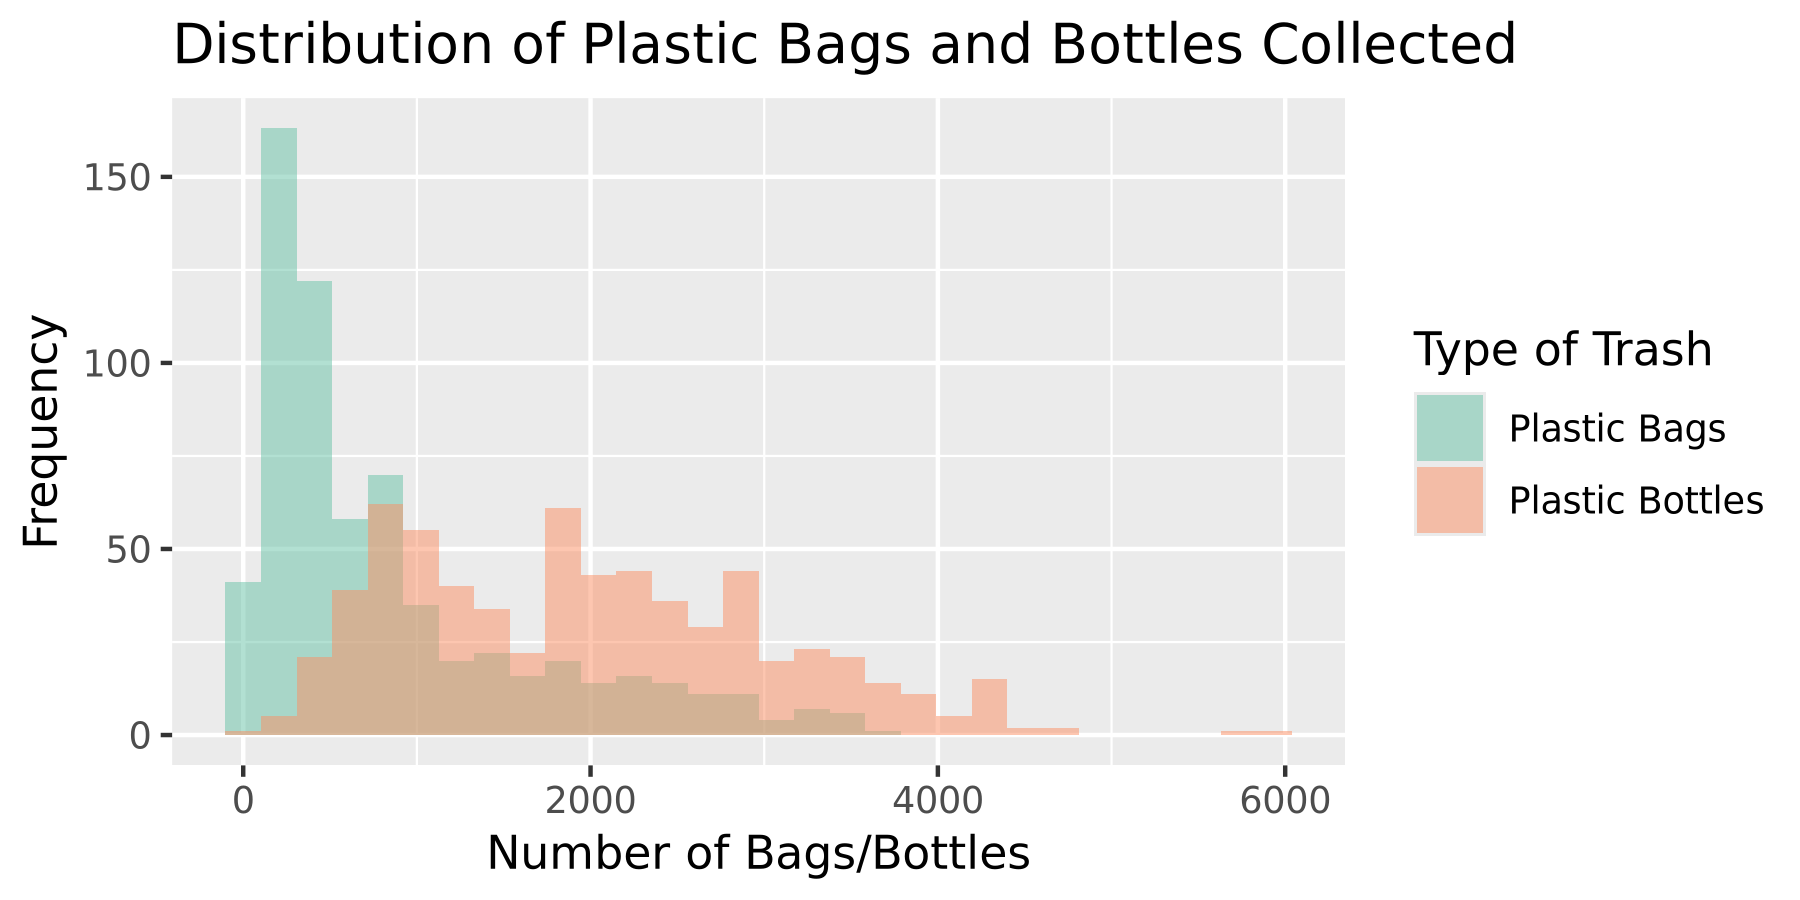

In [181]:
pivot = df |> pivot_longer(cols = c(`Plastic Bags`, `Plastic Bottles`))
#head(pivot)
ggplot(pivot, aes(x=value, fill = name)) + 
    scale_fill_brewer(palette = "Set2", name = "Type of Trash") +
    geom_histogram(position = 'identity', alpha = 0.5) +
    labs(title= 'Distribution of Plastic Bags and Bottles Collected', x= 'Number of Bags/Bottles',  y='Frequency')

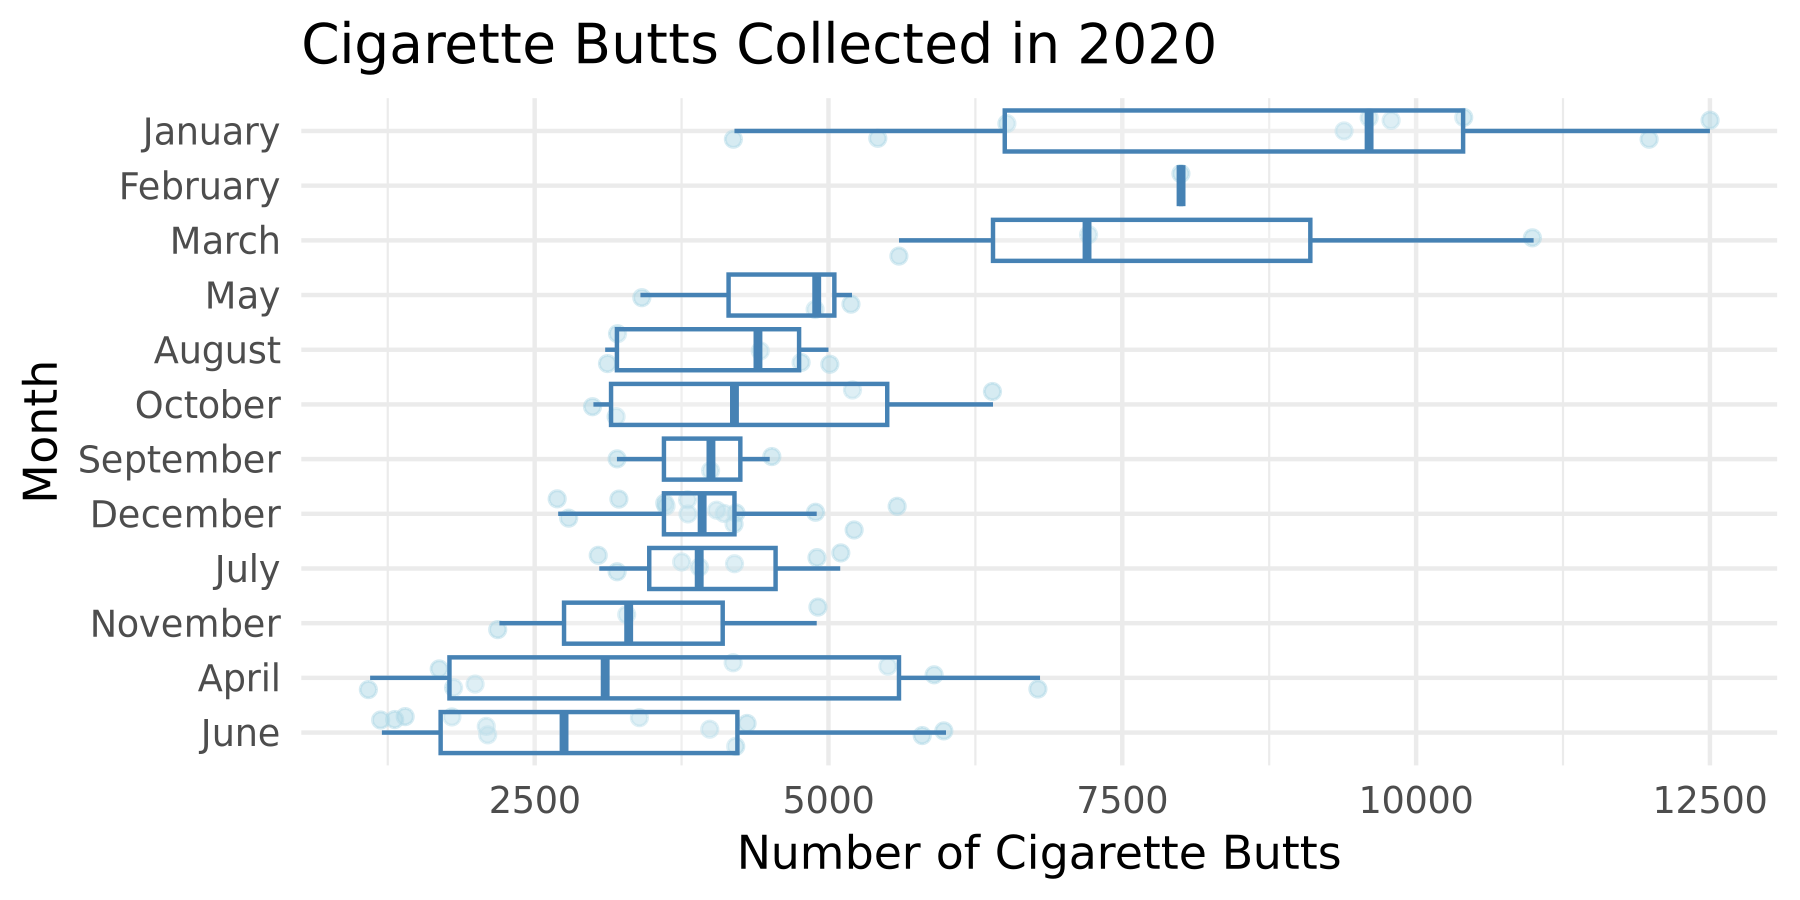

In [182]:
df2020 = df |> filter(Year == 2020)

reordered = df2020|> mutate(Month = fct_reorder(Month, `Cigarette Butts`, median))

ggplot(reordered, aes(x = `Cigarette Butts`, y= Month)) + 
    geom_point(position = position_jitter(h = 0.3), alpha = 0.5, color = 'lightblue') + 
    geom_boxplot(color = 'steelblue', outliers = FALSE, alpha = 0.2) + 
    theme_minimal()+
    labs(title= 'Cigarette Butts Collected in 2020', x= 'Number of Cigarette Butts',  y='Month')

This analysis provides three different visualizations of the data for the trash collected by Mr. Trash Wheel from 2014 through part of 2024. In the first visualization, the line graph, I wanted to see how the total amount of trash collected differed by year. Through this visualization I was able to determine that there was not a full amount of data for 2024, as the graph sharply declines following 2023. Because of this, I added the annotation indicating that 2023 was the last year for which the full amount of data was collected. Going forward, I wanted to visualize how the amount of different types of trash collected differed. For this, I specifically focused on plastic, namely plastic bags and bottles. From this histogram, I am able to see that for the most part, there are many more plastic bottles collected than plastic bags at one point in time where data was collected.

Finally, I wanted to look at how trash collection may have differed based on month. For this, I focused specifically on 2020 data looking at cigarette butts. I sorted the chart by decreasing median cigarette butts collected per month. From this, I was able to determine that the number of cigarette butts collected in the first three months of 2020, namely January, February, and March was much higher than the rest of the months. This may be attributed to COVID, where after March 2020, people were more hesitant to leave their homes and therefore did not smoke outside and litter cigarette butts as much during this time. This is also exemplified by the fact that april has the second lowest median collection of cigarette butts, showing this sharp decline in the collection. 